<a href="https://colab.research.google.com/github/RajabovX/MachineLearning/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#LogisticRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("accident.csv")

In [24]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [25]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["Helmet_Used"] = le.fit_transform(df["Helmet_Used"])
df["Seatbelt_Used"] = le.fit_transform(df["Seatbelt_Used"])

In [26]:
X = df.drop(columns=["Survived"])
y = df["Survived"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [30]:
y_pred = model.predict(X_test_scaled)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

In [32]:
print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Logistic Regression Model Evaluation:
Accuracy: 0.5500
Precision: 0.5000
Recall: 0.3889
F1-Score: 0.4375

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.68      0.62        22
           1       0.50      0.39      0.44        18

    accuracy                           0.55        40
   macro avg       0.54      0.54      0.53        40
weighted avg       0.54      0.55      0.54        40



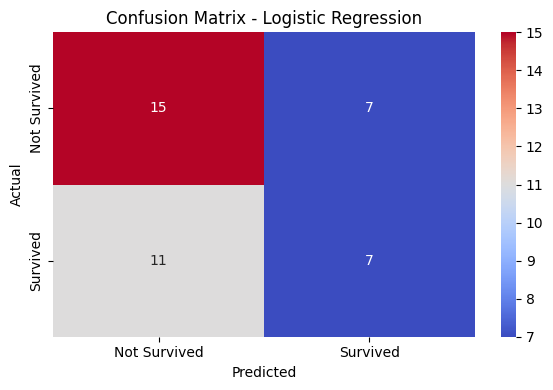

In [33]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()